# General Setup (Mapping)

In [1]:
# Import the geopandas and geoplot libraries
!pip install geopandas
!pip install geoplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 11.5 MB/s eta 0:00:00


In [2]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import seaborn as sns

# Set up the color scheme:
import mapclassify as mc

<GeoAxes: >

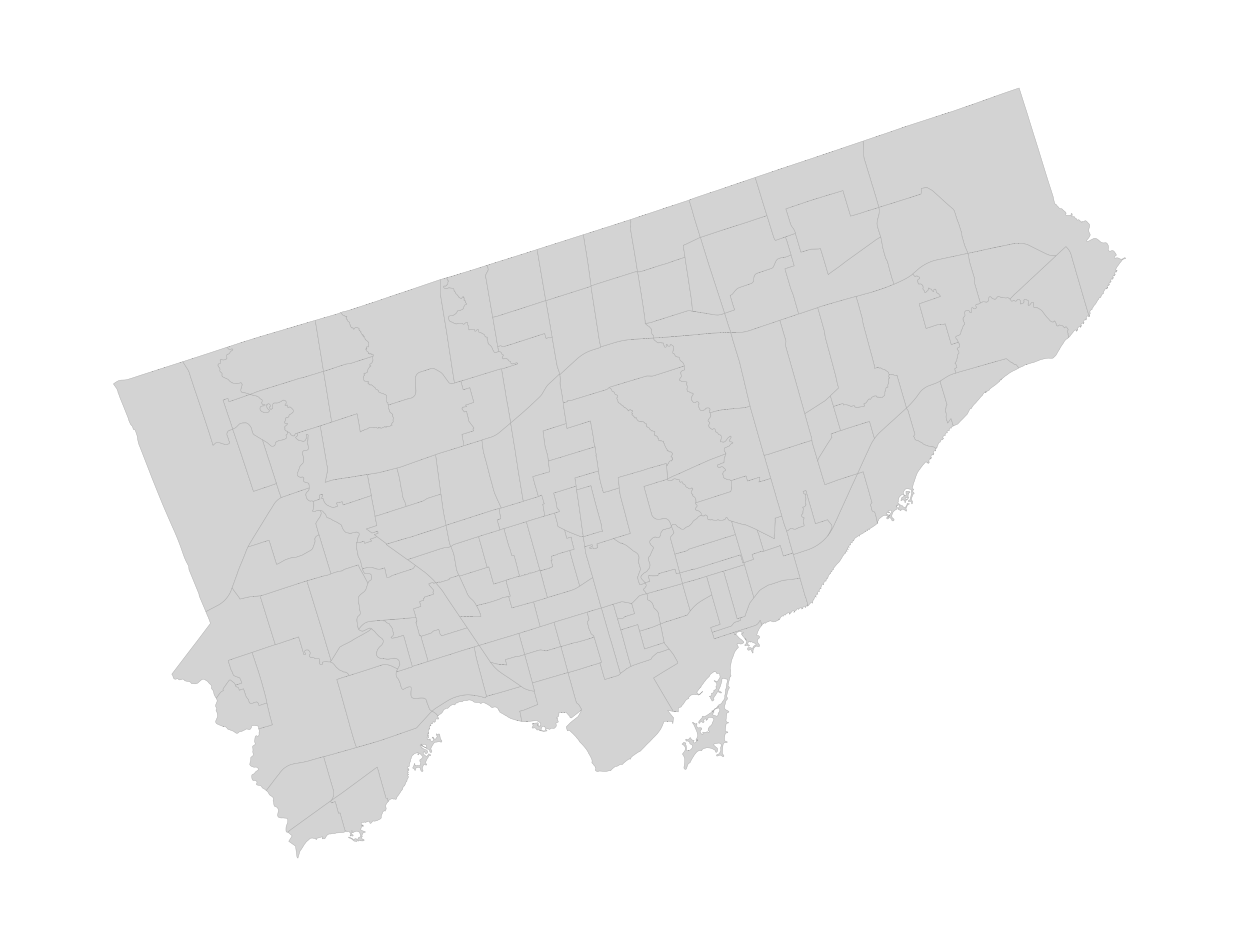

In [4]:
# Load the json file with coordinates
geo_data = gpd.read_file("drive/My Drive/development/MachineLearning/Neighborhoods/data_in/C1_Toronto_Neighborhoods/neighbourhoods.geojson")

# Basic plot with just outlines
gplt.polyplot(
    geo_data,
    projection=gcrs.AlbersEqualArea(),
    edgecolor='darkgrey',
    facecolor='lightgrey',
    linewidth=.3,
    figsize=(16, 12)
)


In [5]:
def choropleth_quick_plot(geo_data, data, left_col, right_col, display_col, colour_scheme):
  # Show the distribution
  fullData = geo_data.merge(data, left_on=[left_col], right_on=[right_col])
  #fullData.head(2)

  # Initialize the figure
  scheme = mc.Quantiles(fullData[display_col], k=20)

  # Map
  gplt.choropleth(fullData,
      projection=gcrs.AlbersEqualArea(),
      hue=display_col,
      linewidth=.1,
      figsize=(16, 12),
      scheme=scheme,
      cmap=colour_scheme,
      legend=True,
  );

#Similarity

I waas inspired by spme of the work on this website and I want to apply something similar to the Toronto neighbourhoods data https://www.dshkol.com/2018/normal-canadian-city/


I will cover two metrics for similarity analysis: using the $L_1$ (Manhattan) and $L_2$ (Euclidean) distance respectively.

## Manhattan (L1) Distance

We will proceed with several steps such as:

1.   Importing the data
2.   Processing the data
3.   Taking the manhattan distance of features catagory-wise
4.   Find the most similar neighbourhoods

In [6]:
#age groups, educational attintment, commute tpye,{{ immigrant status}}}, (owner vs renter) [[[ housing type, wealth, density

#Importing Info
data = pd.read_csv("drive/My Drive/development/MachineLearning/Neighborhoods/data_in/C1_Toronto_Neighborhoods/focussed_neighborhoods_data.csv", encoding='utf-8')
#data1 = data.drop(data.columns[[0]], axis=1)  # df.columns is zero-based pd.Index
#data1 = data.dropna()
#data['education'] =data['edu_hc_none_perc']+ data['edu_hc_hschool_perc']+data[ 'edu_hc_more_perc']+ data['edu_hc_univ_perc']
data.drop(['edu_hc_none_perc', 'edu_hc_hschool_perc', 'edu_hc_more_perc','edu_hc_univ_perc' ], axis=1, inplace=True)

# snap shot of data
data.head()

#take columns
a = data.head(0)
print(a.columns)

# Creating an empty Dataframe with column names only
dfObj = pd.DataFrame()
#dfObj = pd.DataFrame(columns=a.columns)
dfObj1 = dfObj
#for counter in range(0,data2.index):
# data2["pop_den"][counter] = data2["pop_den"][counter].replace(',', '')


# cleaning data
#data2["pop_den"] =  int(data2["pop_den"])
data['pop_den']=data['pop_den'].str.replace(',','')
data['pop_den']=pd.to_numeric(data['pop_den'],errors='coerce').fillna(0, downcast='infer')
#print(data2.index)
data["pop_den"] = data["pop_den"]/ data["pop_den"][0]
#data2.dtypes
#data3 = abs(data2['ac_0_14_perc'] - data2['ac_0_14_perc'][0])
#dfObj
data2 = data
#data.to_csv("drive/My Drive/development/MachineLearning/Neighborhoods/234.csv")

# manhattan distance
for counter in range(2,len(a.columns)):
   num = abs(data2.iloc[:, counter] - data2.iloc[:, counter][0])
   hu1 = pd.DataFrame({a.columns[counter]:num.values})
   #dfObj = hu1
   #dfObj.insert(loc=counter, column='A', value=hu1)#loc=idx, column='A'
   #print(hu1)
   #print(dfobj)
   dfObj = pd.concat([dfObj,hu1],axis=1)

#print to csv
#print(hu1)
dfObj.to_csv("drive/My Drive/development/MachineLearning/Neighborhoods/data_out/C1_Toronto_Neighborhoods/P3_What_Toronto_Neighborhood_is_Most_Respresentative_of_the_Metro/manhattan_dist.csv")
#a.columns

Index(['name', 'ngbd_id', 'ac_0_14_perc', 'ac_15_24_perc', 'ac_25_54_perc',
       'ac_55_64_perc', 'ac_65_over_perc', 'ac_85_over_perc',
       'mmcom_driver_perc', 'mmcom_pass_perc', 'mmcom_public_perc',
       'mmcom_walk_perc', 'mmcom_bike_perc', 'mmcom_other_perc',
       'hou_tenure_owner_perc', 'hou_tenure_renter_perc', 'IC_nonimm',
       'IC_imm', 'dwtype_house_perc', 'dwtype_apmt_perc', 'dwtype_other_perc',
       'pop_den', 'ih_hh_5K_perc', 'ih_hh_10K_perc', 'ih_hh_15K_perc',
       'ih_hh_20K_perc', 'ih_hh_25K_perc', 'ih_hh_30K_perc', 'ih_hh_35K_perc',
       'ih_hh_40K_perc', 'ih_hh_45K_perc', 'ih_hh_50K_perc', 'ih_hh_60K_perc',
       'ih_hh_70K_perc', 'ih_hh_80K_perc', 'ih_hh_90K_perc', 'ih_hh_100K_perc',
       'ih_hh_100K_over_perc', 'hcd_no_certif', 'hcd_sec_dip', 'hcd_post_sec',
       'hcd_post_sec_apprentice', 'hcd_post_sec_college',
       'hcd_post_sec_university', 'hcd_post_sec_university_bachelor_plus'],
      dtype='object')


In [7]:
#manhattan dist
data3= pd.DataFrame()
data3["Neighbourhoods"] = data2.iloc[:, 0]
data  = pd.read_csv("drive/My Drive/development/MachineLearning/Neighborhoods/data_out/C1_Toronto_Neighborhoods/P3_What_Toronto_Neighborhood_is_Most_Respresentative_of_the_Metro/manhattan_dist.csv")
data3['aga_similarity'] =data['ac_0_14_perc']+ data['ac_15_24_perc']+data[ 'ac_25_54_perc']+ data['ac_55_64_perc'] + data['ac_65_over_perc']+ data['ac_85_over_perc']
#data['education'] =data['edu_hc_none_perc']+ data['edu_hc_hschool_perc']+data[ 'edu_hc_more_perc']+ data['edu_hc_univ_perc']
data3['mmcom'] =data['mmcom_driver_perc']+ data['mmcom_pass_perc']+data[ 'mmcom_public_perc']+ data['mmcom_walk_perc'] + data['mmcom_bike_perc']+ data['mmcom_other_perc']
data3['house'] =data['hou_tenure_owner_perc']+ data['hou_tenure_renter_perc']
data3['IC'] =data['IC_nonimm']+ data['IC_imm']
data3['dw_type'] = data['dwtype_house_perc']+ data['hou_tenure_renter_perc']+ data['dwtype_other_perc']
data3['pop_den'] =data['pop_den']
#data3['dw_type'] =data['dwtype_house_perc']+ data['hou_tenure_renter_perc']
# split to catagorie
data3['ih_hh'] =data['ih_hh_5K_perc']+ data['ih_hh_10K_perc']+data['ih_hh_15K_perc']+ data['ih_hh_20K_perc'] + data['ih_hh_25K_perc'] + \
data['ih_hh_30K_perc'] + data['ih_hh_35K_perc']+ data['ih_hh_40K_perc']+data[ 'ih_hh_45K_perc']+ data['ih_hh_50K_perc'] + data['ih_hh_60K_perc']+ data['ih_hh_70K_perc']+\
data['ih_hh_80K_perc']+ data['ih_hh_90K_perc']+data[ 'ih_hh_100K_perc']+ data['ih_hh_100K_over_perc']
data3['hc'] =  data['hcd_no_certif']+data[ 'hcd_sec_dip']+ data['hcd_post_sec']
data3['hcd_post_sec_result'] = data[ 'hcd_post_sec_apprentice']+ data['hcd_post_sec_college']  + data['hcd_post_sec_university'] + data[ 'hcd_post_sec_university_bachelor_plus']
data3["final"]  = data3['aga_similarity']+ data3['mmcom']+data3['house'] + data3['IC']+data3['dw_type'] +data3['ih_hh']+data3['hc'] +data3['hcd_post_sec_result']
data3["final_popd"]  = data3['aga_similarity']+ data3['mmcom']+data3['house'] + data3['IC']+data3['dw_type'] + data3["pop_den"] +data3['ih_hh']+data3['hc'] +data3['hcd_post_sec_result']


In [8]:
#manhattan distance
# print(" Most similar neighbourhood in Toronto by age similarity")
# print(data3.sort_values("aga_similarity"))
# print(" Most similar neighbourhood in Toronto by main commute mode")
# print(data3.sort_values("mmcom"))
# print(" Most similar neighbourhood in Toronto by number of owner/renters")
# print(data3.sort_values("house"))
# print(" Most similar neighbourhood in Toronto by immigrant status")
# print(data3.sort_values("IC"))
# print(" Most similar neighbourhood in Toronto by type of housing")
# print(data3.sort_values("dw_type"))
# print(" Most similar neighbourhood in Toronto by popuation density")
# print(data3.sort_values("pop_den"))
# print(" Most similar neighbourhood in Toronto by income prosperity")
# print(data3.sort_values("ih_hh"))
# print(" Most similar neighbourhood in Toronto by education")
# print(data3.sort_values("hc"))
# print(" Most similar neighbourhood in Toronto by post -secondary satus")
# print(data3.sort_values("hcd_post_sec_result"))
print(" Overall Most similar neighbourhood in Toronto (without population density")
print(data3.sort_values("final"))
print("Overall Most similar neighbourhood in Toronto( with pop_density )")
print(data3.sort_values("final_popd"))

#print(data3.sort_values("final"))

# csv output
#commute vehicle , commute time , neighbourhood equty, ttc transit info, walkability,  type of dwelling
data3.to_csv("drive/My Drive/development/MachineLearning/Neighborhoods/data_out/C1_Toronto_Neighborhoods/P3_What_Toronto_Neighborhood_is_Most_Respresentative_of_the_Metro/manhattan_dist_final.csv")

 Overall Most similar neighbourhood in Toronto (without population density
                        Neighbourhoods  aga_similarity  mmcom  house  \
0                      City of Toronto            0.00   0.00   0.00   
26                        Clanton Park            0.05   0.20   0.02   
6                       Bathurst Manor            0.09   0.19   0.02   
59          Islington-City Centre West            0.06   0.16   0.10   
92                     Oakwood Village            0.04   0.27   0.00   
..                                 ...             ...    ...    ...   
23              Centennial Scarborough            0.17   0.39   0.81   
7                  Bay Street Corridor            0.40   0.82   0.42   
65                      Kingsway South            0.22   0.28   0.57   
100                 Princess-Rosethorn            0.22   0.54   0.64   
17   Bridle Path-Sunnybrook-York Mills            0.24   0.51   0.76   

           IC   dw_type   pop_den     ih_hh        hc  hcd_p

With or without population density, the most overall most similar neighbourhood in Toronto is Clanton Park. Even When comparing the similarities of each feature class, Clanton Park remains quite similar.

## Euclidean (L2) Distance

We will proceed with several steps such as:

1.   Importing the data
2.   Processing the data
3.   Taking the euclidean distance of features catagory-wise
4.   Find the most similar neighbourhoods

In [9]:
#euclidean distance
for counter in range(2,len(a.columns)):
   num = pow((data2.iloc[:, counter] - data2.iloc[:, counter][0]),2)
   hu1 = pd.DataFrame({a.columns[counter]:num.values})
    #dfObj.insert(loc=counter, column='A', value=hu1)#loc=idx, column='A'
   #print(hu1)
   #print(dfobj)
   dfObj1 = pd.concat([dfObj1,hu1],axis=1)

# data to csv
dfObj1.to_csv("drive/My Drive/development/MachineLearning/Neighborhoods/data_out/C1_Toronto_Neighborhoods/P3_What_Toronto_Neighborhood_is_Most_Respresentative_of_the_Metro/euclidean_dist.csv")

In [11]:
#euclidean distance
data4= pd.DataFrame()
data4["Neighbourhoods"] = data2.iloc[:, 0]
data  = pd.read_csv("drive/My Drive/development/MachineLearning/Neighborhoods/data_out/C1_Toronto_Neighborhoods/P3_What_Toronto_Neighborhood_is_Most_Respresentative_of_the_Metro/euclidean_dist.csv")
data4['aga_similarity'] =pow(data['ac_0_14_perc']+ data['ac_15_24_perc']+data[ 'ac_25_54_perc']+ data['ac_55_64_perc'] + data['ac_65_over_perc']+ data['ac_85_over_perc'],1/2)
#data['education'] =data['edu_hc_none_perc']+ data['edu_hc_hschool_perc']+data[ 'edu_hc_more_perc']+ data['edu_hc_univ_perc']
data4['mmcom'] =pow(data['mmcom_driver_perc']+ data['mmcom_pass_perc']+data[ 'mmcom_public_perc']+ data['mmcom_walk_perc'] + data['mmcom_bike_perc']+ data['mmcom_other_perc'],1/2)
data4['house'] =pow(data['hou_tenure_owner_perc']+ data['hou_tenure_renter_perc'],1/2)
data4['IC'] =pow(data['IC_nonimm']+ data['IC_imm'],1/2)
data4['dw_type'] = pow(data['dwtype_house_perc']+ data['hou_tenure_renter_perc']+ data['dwtype_other_perc'],1/2)
data4['pop_den'] =pow(data['pop_den'],1/2)
#data3['dw_type'] =data['dwtype_house_perc']+ data['hou_tenure_renter_perc']
# split to catagorie
data4['ih_hh'] =pow(data['ih_hh_5K_perc']+ data['ih_hh_10K_perc']+data['ih_hh_15K_perc']+ data['ih_hh_20K_perc'] + data['ih_hh_25K_perc'] + \
data['ih_hh_30K_perc'] + data['ih_hh_35K_perc']+ data['ih_hh_40K_perc']+data[ 'ih_hh_45K_perc']+ data['ih_hh_50K_perc'] + data['ih_hh_60K_perc']+ data['ih_hh_70K_perc']+\
data['ih_hh_80K_perc']+ data['ih_hh_90K_perc']+data[ 'ih_hh_100K_perc']+ data['ih_hh_100K_over_perc'],1/2)
data4['hc'] =  pow(data['hcd_no_certif']+data[ 'hcd_sec_dip']+ data['hcd_post_sec'],1/2)
data4['hcd_post_sec_result'] = pow(data[ 'hcd_post_sec_apprentice']+ data['hcd_post_sec_college']  + data['hcd_post_sec_university'] + data[ 'hcd_post_sec_university_bachelor_plus'],1/2)
data4["final"]  = pow(data4['aga_similarity']+ data4['mmcom']+data4['house'] + data4['IC']+data4['dw_type'] +data4['ih_hh']+data4['hc'] +data4['hcd_post_sec_result'],1/2)
data4["final_popd"]  = data4['aga_similarity']+ data4['mmcom']+data4['house'] + data4['IC']+data4['dw_type'] + data4["pop_den"] +data4['ih_hh']+data4['hc'] +data4['hcd_post_sec_result']


In [18]:
#euclidean distance printing
# print(" Most similar neighbourhood in Toronto by age similarity")
# print(data4.sort_values("aga_similarity"))
# print(" Most similar neighbourhood in Toronto by main commute mode")
# print(data4.sort_values("mmcom"))
# print(" Most similar neighbourhood in Toronto by number of owner/renters")
# print(data4.sort_values("house"))
# print(" Most similar neighbourhood in Toronto by immigrant status")
# print(data4.sort_values("IC"))
# print(" Most similar neighbourhood in Toronto by type of housing")
# print(data4.sort_values("dw_type"))
# print(" Most similar neighbourhood in Toronto by popuation density")
# print(data4.sort_values("pop_den"))
# print(" Most similar neighbourhood in Toronto by income prosperity")
# print(data4.sort_values("ih_hh"))
# print(" Most similar neighbourhood in Toronto by education")
# print(data4.sort_values("hc"))
# print(" Most similar neighbourhood in Toronto by post -secondary satus")
# print(data4.sort_values("hcd_post_sec_result"))
print(" Overall Most similar neighbourhood in Toronto (without population density")
print(data4.sort_values("final"))
print("Overall Most similar neighbourhood in Toronto( with pop_density )")
print(data4.sort_values("final_popd"))

#csv out
data4.to_csv("drive/My Drive/development/MachineLearning/Neighborhoods/data_out/C1_Toronto_Neighborhoods/P3_What_Toronto_Neighborhood_is_Most_Respresentative_of_the_Metro/euclidean_dist_final.csv")

 Overall Most similar neighbourhood in Toronto (without population density
                        Neighbourhoods  aga_similarity     mmcom     house  \
0                      City of Toronto        0.000000  0.000000  0.000000   
26                        Clanton Park        0.026458  0.100995  0.014142   
6                       Bathurst Manor        0.053852  0.099499  0.014142   
59          Islington-City Centre West        0.028284  0.091652  0.070711   
92                     Oakwood Village        0.028284  0.153297  0.000000   
..                                 ...             ...       ...       ...   
23              Centennial Scarborough        0.084261  0.219773  0.572800   
7                  Bay Street Corridor        0.189209  0.512445  0.296985   
65                      Kingsway South        0.120830  0.154272  0.403113   
100                 Princess-Rosethorn        0.115758  0.328024  0.452548   
17   Bridle Path-Sunnybrook-York Mills        0.128062  0.309677  0

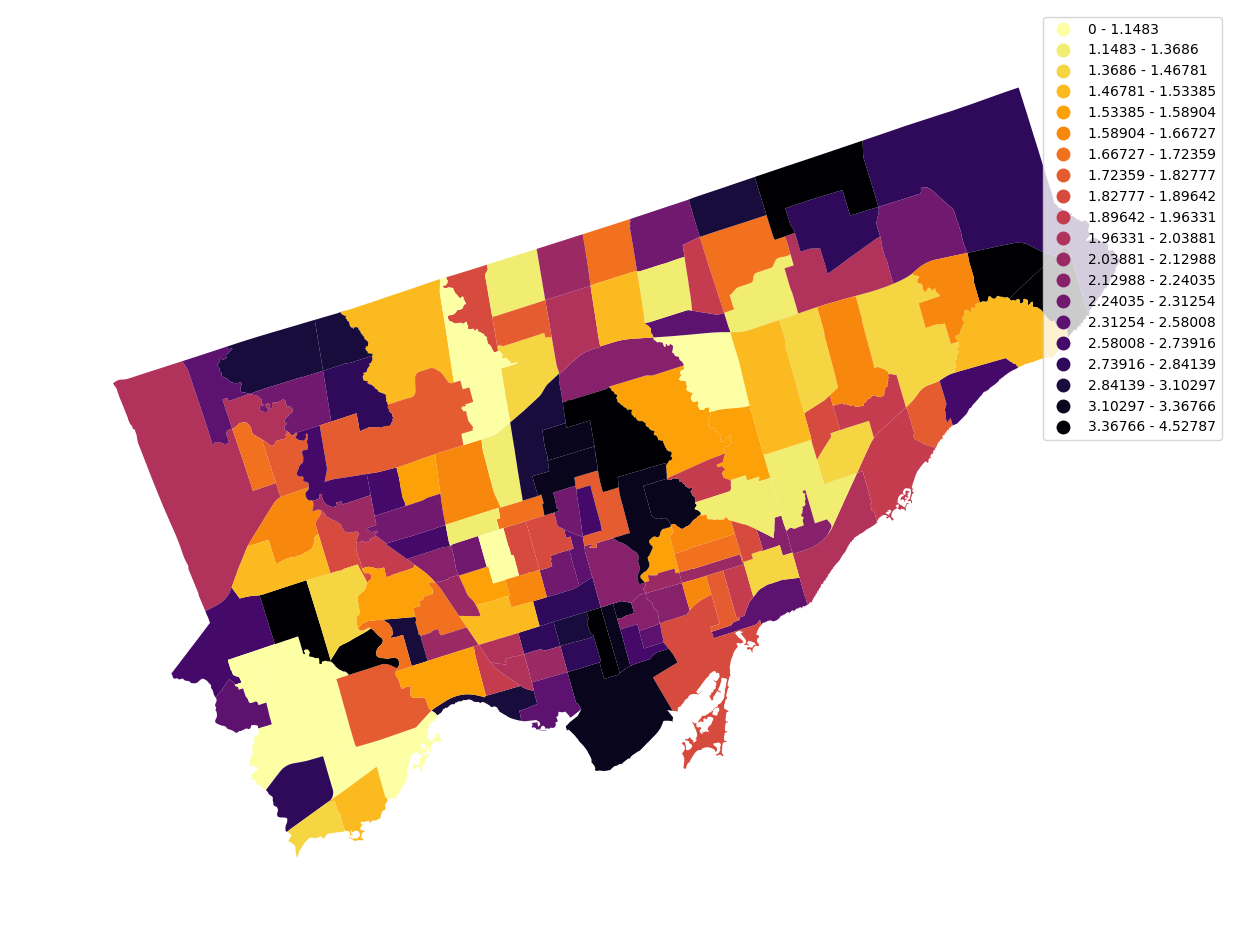

In [14]:
# Read file
data = pd.read_csv("drive/My Drive/development/MachineLearning/Neighborhoods/data_out/C1_Toronto_Neighborhoods/P3_What_Toronto_Neighborhood_is_Most_Respresentative_of_the_Metro/manhattan_dist_final.csv", encoding='utf-8')
data = data.iloc[1: , :]
data  = data.dropna()

data1 = pd.read_csv("drive/My Drive/development/MachineLearning/Neighborhoods/data_out/C1_Toronto_Neighborhoods/P3_What_Toronto_Neighborhood_is_Most_Respresentative_of_the_Metro/euclidean_dist_final.csv", encoding='utf-8')
data1 = data1.iloc[1: , :]
#data1['name']

data1['final_manhattan'] = data['final']
data1['final_manhattan_pop'] = data['final_popd']

choropleth_quick_plot(geo_data, data1, 'neighbourhood','Neighbourhoods', "final_manhattan", 'inferno_r')

# # Show the distribution of unemployment rate
# sns.distplot( data1["final"], hist=True, kde=False, rug=False );

# fullData = geoData.merge(data1, left_on=['neighbourhood'], right_on=['Neighbourhoods'])

# fullData.head(2)

With or without population density, the most overall most similar neighbourhood in Toronto is Clanton Park which are the same results as with the manhattan distance. Again, even when comparing the similarities of each feature class, Clanton Park remains quite similar.

## Comparing Most Similar Neighborhood With Toronto

Both the manhattan and euclidean distance metrics showed that the neighbourhopd of Clanton Park shares the most demographc similaroties with the City of Toronto

We will plot data from Clanton Park and the City of Toronto

4334
3979


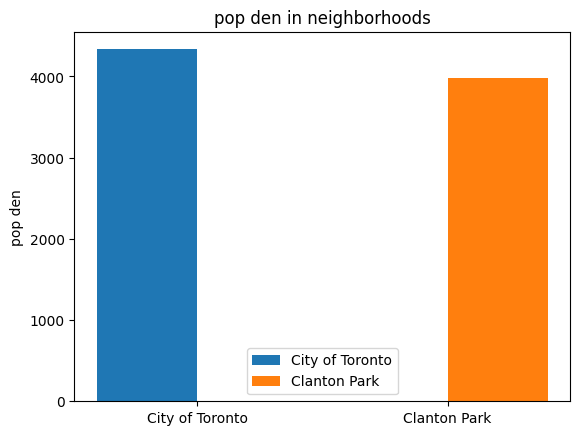

In [33]:
# Import data
data = pd.read_csv("drive/My Drive/development/MachineLearning/Neighborhoods/data_in/C1_Toronto_Neighborhoods/focussed_neighborhoods_data.csv", encoding='utf-8',index_col=False)
data['pop_den']=data['pop_den'].str.replace(',','')
data['pop_den']=pd.to_numeric(data['pop_den'],errors='coerce').fillna(0, downcast='infer')
#print(data['pop_den'])
#data['pop_den'][0].plot.bar(rot=0)#figue figsize
print(data["pop_den"][0])
print(data["pop_den"][26])
X = ['City of Toronto','Clanton Park']
Yrrr = [data["pop_den"][0],0]
Zrr = [0,data["pop_den"][26]]

# plot
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, Yrrr, 0.4, label = 'City of Toronto')
plt.bar(X_axis + 0.2, Zrr, 0.4, label = 'Clanton Park')
plt.xticks(X_axis, X)
#plt.xlabel("Groups")
plt.ylabel("pop den")
plt.title("pop den in neighborhoods")
plt.legend()
plt.show()





In [34]:
#transform data
data = data.drop(columns=['pop_den'])
data = data.drop(columns=['ngbd_id'])
X = ['City of Toronto','Clanton Park']
toronto_data = data.loc[data['name'] == 'City of Toronto']
clanton_data = data.loc[data['name'] == 'Clanton Park']
#a = .drop(a.columns[[0]], axis=1)  # df.columns is zero-based pd.Index
#aab = aab.drop(aab.columns[[0]], axis=1)  # df.columns is zero-based pd.Index
result = pd.concat([toronto_data,clanton_data])
print(result)

#result.
#result = result.transpose()
#result.set_index('name',inplace=True)
#transpose
result.set_index('name',inplace=True)
result = result.transpose()
a.head(0)
print(result)
result.to_csv("drive/My Drive/development/MachineLearning/Neighborhoods/data_out/C1_Toronto_Neighborhoods/P3_What_Toronto_Neighborhood_is_Most_Respresentative_of_the_Metro/comparison.csv")
#result.dtypes()
# a = h.join(aab)


               name  ac_0_14_perc  ac_15_24_perc  ac_25_54_perc  \
0   City of Toronto          0.14           0.12           0.44   
26     Clanton Park          0.16           0.11           0.44   

    ac_55_64_perc  ac_65_over_perc  ac_85_over_perc  edu_hc_none_perc  \
0            0.12             0.15             0.02              0.16   
26           0.11             0.14             0.02              0.13   

    edu_hc_hschool_perc  edu_hc_more_perc  ...  ih_hh_90K_perc  \
0                  0.24              0.16  ...        0.054271   
26                 0.24              0.17  ...        0.058779   

    ih_hh_100K_perc  ih_hh_100K_over_perc  hcd_no_certif  hcd_sec_dip  \
0          0.048058              0.308663       0.102774     0.203934   
26         0.047328              0.325954       0.041132     0.196047   

    hcd_post_sec  hcd_post_sec_apprentice  hcd_post_sec_college  \
0       0.693288                 0.058737              0.259454   
26      0.763355         

<class 'pandas.core.series.Series'>


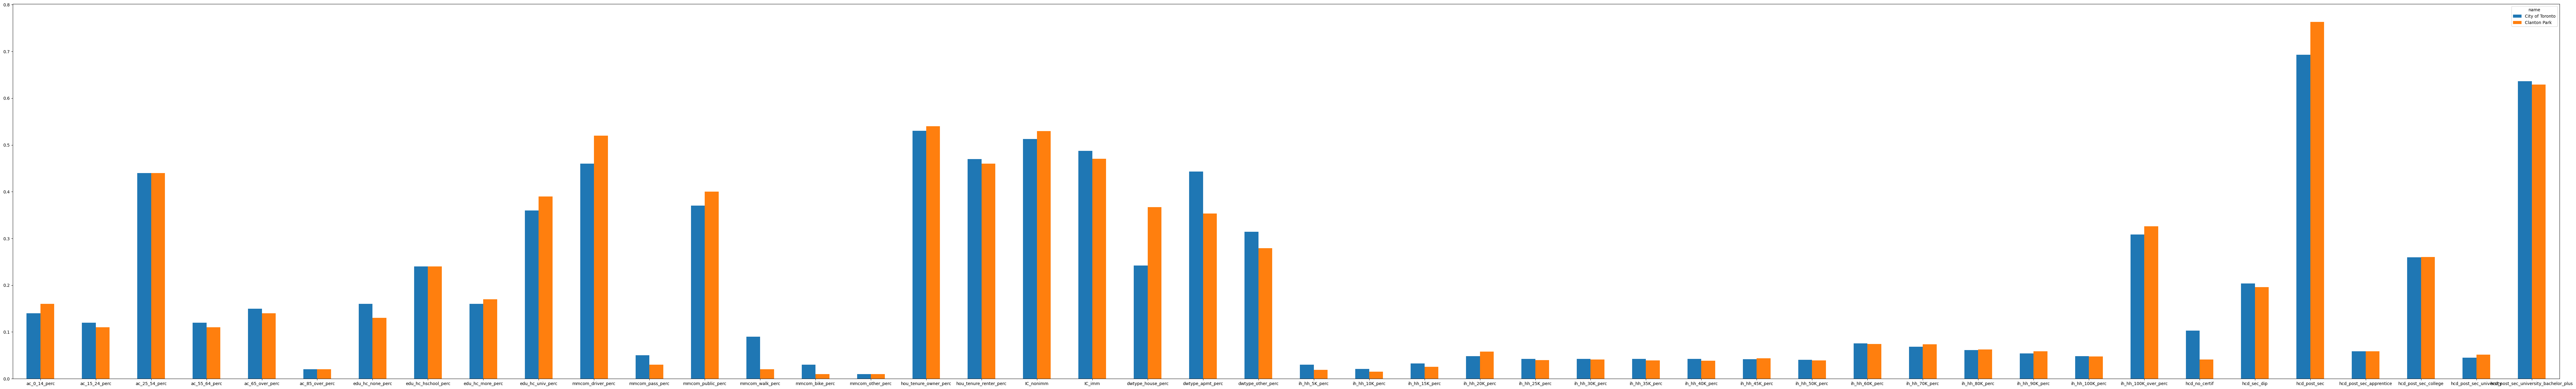

In [35]:

#plot second graph
st = type(result["Clanton Park"])
print(st)
result.plot.bar(rot=0, figsize = (108,16))
#y=a.head(0), kind="bar",figsize=(9,8))
plt.show()

We are able to see the similairty score of Clanton Park with the city of Toronto as a whole and along constituent features. However, we can see there a major difference in the dwelling types as Clanton Park has more single family houses and less apartments than the city of Toronto. ZTgus we could say that it is more suburban.